In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/pt/dev.tsv", sep='\t')

In [4]:
df.head(15)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27030949.mp3,6b71905bea95cbd18c518819ab645b1faa5ebe58607792...,"Camilo estremeceu, tinha medo:",NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
1,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27030950.mp3,813e2d6269335b098168bfd6b9c672fe200ff3bbf46671...,Eu vi mamãe Oxum na cachoeira sentada na beira...,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
2,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27030953.mp3,79fce9323a743569857cddd5a42478e4ed2fcf0c4b9065...,Vire de vez em quando.,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
3,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031030.mp3,70d571668c69bd4570b05fdd058c3c18894cec38ad6251...,Agronômica,NaN,3,0,NaN,NaN,NaN,NaN,pt,NaN
4,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031031.mp3,7af4ca9334d6f973447b109579b339ab0589a537885311...,Temos que procurar um modelo alternativo e con...,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
5,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031032.mp3,7263a5d133e97ba526da34d861951f002d837496b2a198...,Esmagar a gaiola se o porto te chama.,NaN,2,1,NaN,NaN,NaN,NaN,pt,NaN
6,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031033.mp3,8d157aa6537a7b410fa7cfb947652f09c3e07808d26758...,E foi a bordo recebê-lo.,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
7,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031034.mp3,769a5c750055ce8eddaaad3453a5e1031acd4f78121a12...,"Por gentileza, leia as notícias do dia",NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
8,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031076.mp3,84f26e72782d21bc2a1a3a003538a9aad3b1962e45aa31...,"Na metade do cozimento, adicione o alho picado...",NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
9,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031078.mp3,868f8f82b02616898ee543817bae40dd6fc23a386b0ab0...,O espartilho apertou-o.,NaN,3,2,NaN,NaN,NaN,NaN,pt,NaN


In [5]:
#pip install librosa

In [6]:
import librosa

audio, sr = librosa.load("data/pt/clips/common_voice_pt_27030949.mp3", sr=16000, mono=True)
audio = audio / max(abs(audio))

In [7]:
from IPython.display import Audio, display

display(Audio(audio, rate=16000))

* Embeddings com silêncio tendem a ficar “puxados” para regiões comuns do espaço vetorial.

In [8]:
#pip install silero-vad

In [9]:
import torch
from silero_vad import get_speech_timestamps, load_silero_vad

def remove_silence(audio, sampling_rate=16000):
    audio = torch.tensor(audio, dtype=torch.float32)
    model = load_silero_vad()
    timestamps = get_speech_timestamps(audio, model, sampling_rate=sampling_rate)
    if len(timestamps) == 0:
        return audio.numpy()
    speech_audio = torch.cat([audio[t["start"]:t["end"]] for t in timestamps])
    return speech_audio.numpy()


In [10]:
def truncate(audio, sr=16000, duration=3):
    max_len = sr * duration  # 2 segundos

    if len(audio) < max_len:
        return False, audio   

    return True, audio[:max_len]  # áudio válido e truncado

In [11]:
def pre_emphasis(signal, alpha=0.97):
    return np.append(signal[0], signal[1:] - alpha * signal[:-1])

In [12]:
def pre_process_speech(audio):
    audio, _ = librosa.effects.trim(audio, top_db=20)
    audio = pre_emphasis(audio)
    audio = audio / max(abs(audio))
    is_valid ,audio = truncate(audio)
    return is_valid, audio 

In [13]:
is_valid, processed_speech = pre_process_speech(audio)
if is_valid:
    display(Audio(processed_speech, rate=16000))

In [14]:
import librosa

X = []
y = []

for _, row in df[0:160].iterrows():
    audio, sr = librosa.load("data/pt/clips/"+row['path'], sr=16000)
    is_valid, audio = pre_process_speech(audio)
    if is_valid:
        X.append(audio)        
        y.append(row['client_id'][:5])    # label do locutor


In [15]:
from collections import defaultdict

speaker_audios = defaultdict(list)

for _, row in df[0:100].iterrows():
    audio, sr = librosa.load("data/pt/clips/" + row['path'], sr=16000)
    is_valid, audio = pre_process_speech(audio)

    if is_valid:
        speaker_id = row['client_id'][:5]
        speaker_audios[speaker_id].append(audio)


In [16]:
speaker_audios.keys()

dict_keys(['1e77e', '1fe56', '2a1c6', '2e30c', '30860', '342eb', '345f8', '3f96e'])

In [17]:
def extract_mfcc(audio, sr=16000, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc = mfcc.T  # (frames, features)
    return mfcc

In [18]:
def extract_mfcc(audio):
    n_mfcc = 13
    frame_length = int(0.025 * sr)   
    hop_length = int(0.010 * sr)     

    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=sr,
        n_mfcc=n_mfcc,
        n_fft=frame_length,
        hop_length=hop_length,
        n_mels=26
    )
    return mfcc

In [19]:
speaker_id = '342eb'
audios = speaker_audios[speaker_id]

audios_marcelo = []
audio, sr = librosa.load("tests/a.ogg", sr=16000, mono=True)
_,audio = pre_process_speech(audio)
audios_marcelo.append((audio))
audio, sr = librosa.load("tests/b.ogg", sr=16000, mono=True)
_,audio = pre_process_speech(audio)
audios_marcelo.append((audio))


mfccs = [extract_mfcc(audio) for audio in audios_marcelo]
test = mfccs[0]
mfccs = mfccs[:]

X_speaker = np.hstack(mfccs) 
X_speaker.shape

(13, 484)

In [20]:
mean = X_speaker.mean(axis=1)   # (D,)
std  = X_speaker.std(axis=1)    # (D,)

X_speaker_norm = (X_speaker.T - mean) / (std + 1e-8)

In [21]:
mean.shape

(13,)

In [22]:
C = np.cov(X_speaker_norm.T)
C.shape

(13, 13)

In [23]:
np.mean(X_speaker_norm[-1])

-0.27612117

In [24]:
cond = np.linalg.cond(C)
cond

11.274542808046835

In [25]:
C

array([[ 1.00207032,  0.0537754 , -0.2965003 ,  0.10458711, -0.02879966,
        -0.1956508 , -0.32975553, -0.15580907,  0.04627032, -0.31697579,
         0.25259359, -0.27590445,  0.06987823],
       [ 0.0537754 ,  1.00207035, -0.06076479, -0.13642523, -0.12067999,
        -0.17050462,  0.15449059, -0.08095268,  0.18452813, -0.62480444,
         0.16180579, -0.22309784, -0.0972087 ],
       [-0.2965003 , -0.06076479,  1.00207034, -0.18103133, -0.10896369,
         0.21663919,  0.05991915,  0.24349773, -0.01764507,  0.01985769,
        -0.21276294, -0.0103429 ,  0.05427094],
       [ 0.10458711, -0.13642523, -0.18103133,  1.00207039,  0.37696549,
        -0.15708664, -0.00745334, -0.17258786,  0.26245386,  0.05425079,
        -0.19833656, -0.1442156 , -0.0558525 ],
       [-0.02879966, -0.12067999, -0.10896369,  0.37696549,  1.00207038,
        -0.06598982, -0.38265838,  0.16183594, -0.05787483,  0.17754785,
        -0.10041226, -0.11323417, -0.12354575],
       [-0.1956508 , -0.170504

In [26]:
np.mean( X_speaker_norm[0])

-0.36381343

In [27]:
invC = np.linalg.inv(C)

distances_by_speaker = {}   # <-- média final por locutor

for spk, audios in speaker_audios.items():

    if spk == speaker_id:
        print("locutor de referência:", spk)
        # continue  # deixe comentado se quiser analisar ele também

    speaker_dists = []  # <-- acumula distâncias dos áudios desse locutor

    for audio in audios:

        X_mfcc = extract_mfcc(audio).T      # (frames, 13)
        X_mfcc = (X_mfcc - mean) / std

        dsts = []
        for i in range(X_mfcc.shape[0]):
            diff = X_mfcc[i]
            dist = diff.T @ invC @ diff
            dsts.append(dist)

        speaker_dists.append(np.median(dsts))

    # média das distâncias desse locutor
    mean_dist = np.median(speaker_dists)
    distances_by_speaker[spk] = mean_dist

    print("Distância média:", mean_dist/11, " | locutor:", spk)


Distância média: 3.3274616983914878  | locutor: 1e77e
Distância média: 2.560191314632291  | locutor: 1fe56
Distância média: 2.302416225993144  | locutor: 2a1c6
Distância média: 2.680790031658373  | locutor: 2e30c
Distância média: 3.3119680666737796  | locutor: 30860
locutor de referência: 342eb
Distância média: 2.375212707316914  | locutor: 342eb
Distância média: 3.7268588868577677  | locutor: 345f8
Distância média: 2.8975185224429394  | locutor: 3f96e


Distâncias (self): [35.537404514790396, 31.206334509256493, 39.914709193346866, 34.65502654093574, 33.78020595042073, 30.137794174449674, 36.91174180526769, 31.966535784637326]
Média: 34.26371905913811
Mediana: 34.21761624567823
Máximo: 39.914709193346866


(array([1., 2., 0., 1., 1., 1., 1., 0., 0., 1.]),
 array([30.13779417, 31.11548568, 32.09317718, 33.07086868, 34.04856018,
        35.02625168, 36.00394319, 36.98163469, 37.95932619, 38.93701769,
        39.91470919]),
 <BarContainer object of 10 artists>)

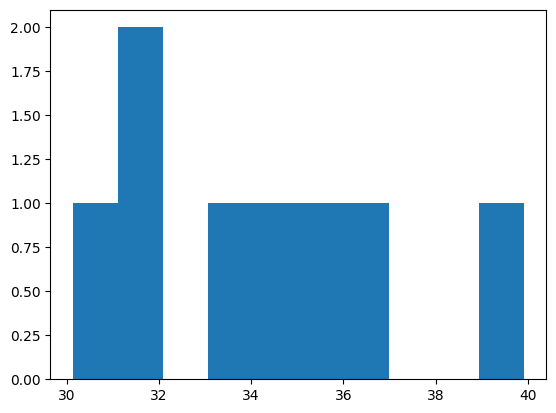

In [28]:
import numpy as np
import matplotlib.pyplot as plt


self_distances = []

for audio in audios:

    X_mfcc = extract_mfcc(audio)
    X_mfcc = (X_mfcc.T - mean) / std

    frame_dists = []
    for i in range(X_mfcc.shape[0]):
        diff = X_mfcc[i]
        dist = diff.T @ invC @ diff
        frame_dists.append(dist)

    self_distances.append(np.mean(frame_dists))

# === RESULTADOS NUMÉRICOS ===
print("Distâncias (self):", self_distances)
print("Média:", np.mean(self_distances))
print("Mediana:", np.median(self_distances))
print("Máximo:", np.max(self_distances))
plt.hist(self_distances)


In [29]:
import numpy as np
import matplotlib.pyplot as plt

all_distances = {}   # {spk: [dist_audio1, dist_audio2, ...]}

for spk, audios_spk in speaker_audios.items():

    speaker_dists = []

    for audio in audios_spk:

        X_mfcc = extract_mfcc(audio)
        X_mfcc = (X_mfcc.T - mean) / std   # normaliza com stats do locutor referência

        frame_dists = []
        for i in range(X_mfcc.shape[0]):
            diff = X_mfcc[i]
            dist = diff.T @ invC @ diff
            frame_dists.append(dist)

        speaker_dists.append(np.mean(frame_dists))

    all_distances[spk] = speaker_dists

    print(
        f"Locutor {spk} | "
        f"média={np.mean(speaker_dists):.3f} | "
        f"mediana={np.median(speaker_dists):.3f}"
    )


Locutor 1e77e | média=41.611 | mediana=42.163
Locutor 1fe56 | média=31.789 | mediana=31.792
Locutor 2a1c6 | média=29.951 | mediana=30.700
Locutor 2e30c | média=31.796 | mediana=31.796
Locutor 30860 | média=39.566 | mediana=36.978
Locutor 342eb | média=29.505 | mediana=29.505
Locutor 345f8 | média=44.532 | mediana=46.701
Locutor 3f96e | média=34.264 | mediana=34.218


In [37]:
X_mfcc =  extract_mfcc(audio).T #X_speaker_norm[-1]
X_mfcc = (X_mfcc-mean)/std
distances = []
for i in range(X_mfcc.shape[0]):
   
    #X_mfcc[:, i]
    diff = X_mfcc[i] - np.zeros(13)
    dist = (diff.T @ np.linalg.inv(C) @ diff)
    distances.append(dist)

total_dist = np.median(distances)
print(total_dist/11)

1.4385501347413294


(array([11.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.27319903e-01, 4.04704651e+01, 8.06136103e+01, 1.20756756e+02,
        1.60899901e+02, 2.01043046e+02, 2.41186191e+02, 2.81329336e+02,
        3.21472482e+02, 3.61615627e+02, 4.01758772e+02]),
 <BarContainer object of 10 artists>)

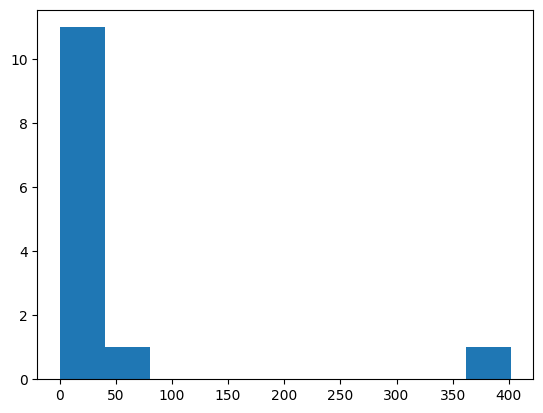

In [31]:
plt.hist(distances)

In [32]:
import librosa

audio, sr = librosa.load("tests/c.ogg", sr=16000, mono=True)
is_valid,audio = pre_process_speech(audio)
if is_valid:
    display(Audio(audio, rate=16000))